In [ ]:
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_excel('/content/Initial Public Offering.xlsx')
print(df)

          Date                                   IPO_Name  Issue_Size(crores)  \
0   2025-08-06                      M & B Engineering Ltd              650.00   
1   2025-08-06          Sri Lotus Developers & Realty Ltd              792.00   
2   2025-08-06  National Securities Depository Ltd (NSDL)             4011.60   
3   2025-08-05                        Aditya Infotech Ltd             1300.00   
4   2025-08-05                    Laxmi India Finance Ltd              254.26   
..         ...                                        ...                 ...   
556 2010-02-03        Infinite Computer Solutions Limited              189.80   
557 2010-01-06                           D B Corp Limited              384.22   
558 2010-01-05                  Godrej Properties Limited              468.85   
559 2010-01-04                         JSW Energy Limited             2700.00   
560 2010-01-11                 MBL Infrastructure Limited              102.60   

        QIB     HNI    RII 

In [ ]:
df = df.info()
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                561 non-null    datetime64[ns]
 1   IPO_Name            561 non-null    object        
 2   Issue_Size(crores)  561 non-null    float64       
 3   QIB                 559 non-null    float64       
 4   HNI                 559 non-null    float64       
 5   RII                 559 non-null    float64       
 6   Total               559 non-null    float64       
 7   Offer Price         561 non-null    int64         
 8   List Price          561 non-null    float64       
 9   Listing Gain        561 non-null    float64       
 10  CMP(BSE)            559 non-null    float64       
 11  CMP(NSE)            551 non-null    float64       
 12  Current Gains       558 non-null    float64       
 13  Unnamed: 13         0 non-null      float64       

In [ ]:
df = df. describe()
print(df)

       Issue_Size(crores)         QIB         HNI         RII       Total  \
count            8.000000    8.000000    8.000000    8.000000    8.000000   
mean          4322.177941  136.715912  228.070326  125.426016  130.726011   
std           9546.113461  201.842364  347.500258  216.690140  203.483654   
min             23.000000    0.000000    0.000000    0.000000    0.110000   
25%            483.547500   10.877500   10.327500    4.240000    9.201250   
50%            914.755000   55.401147   77.898417   14.861082   45.686542   
75%           1719.222861  140.091250  242.339330  118.569470  122.925000   
max          27858.800000  559.000000  958.070000  559.000000  559.000000   

       Offer Price   List Price  Listing Gain      CMP(BSE)      CMP(NSE)  \
count     8.000000     8.000000      8.000000      8.000000      8.000000   
mean    535.683719   644.837345    108.156796   2441.010188   2440.988885   
std     676.560833   863.551471    202.875904   5461.500265   5448.783292  

### **SHOW AND REMOVE DUPLICATES**

In [ ]:
dups = df.duplicated()
print("No. of duplicate rows = %d" % (dups.sum()))

No. of duplicate rows = 0


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
dups = df.duplicated()
print("No. of duplicate rows = %d" % (dups.sum()))

No. of duplicate rows = 0


### **OUTLIER TREATMENT**

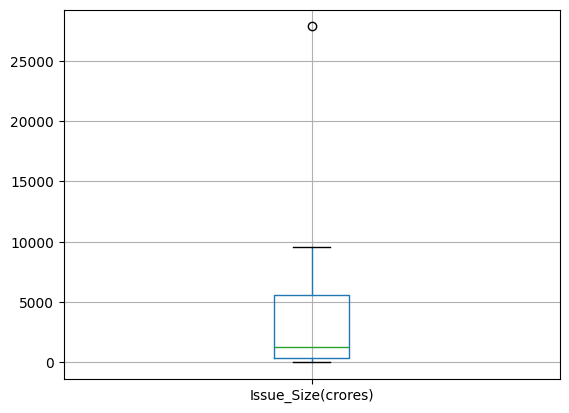

In [ ]:
df.boxplot(column = ['Issue_Size(crores)'])
plt.show()

In [ ]:
def remove_outlier(col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR = Q3-Q1
  lower_range=Q1-(1.5*IQR)
  upper_range=Q3+(1.5*IQR)
  return lower_range,upper_range

In [ ]:
lrissue,urissue=remove_outlier(df['Issue_Size(crores)'])
df['Issue_Size(crores)']=mp.where(df['Issue_Size(crores)']<lrissue,lrissue,df['Issue_Size(crores)'])
df['Issue_Size(crores)']=mp.where(df['Issue_Size(crores)']>urissue,urissue,df['Issue_Size(crores)'])

lrlist,urlist=remove_outlier(df['List Price'])
df['List Price']=mp.where(df['List Price']<lrlist,lrlist,df['List Price'])
df['List Price']=mp.where(df['List Price']>urlist,urlist,df['List Price'])

iroffer,uroffer=remove_outlier(df['Offer Price'])
df['Offer Price']=mp.where(df['Offer Price']<iroffer,iroffer,df['Offer Price'])
df['Offer Price']=mp.where(df['Offer Price']>uroffer,uroffer,df['Offer Price'])

df.shape

(561, 21)

### **MISSING VALUE TREATMENT**

In [ ]:
df.isnull().sum()

,0
Date,0
IPO_Name,0
Issue_Size(crores),0
QIB,2
HNI,2
RII,2
Total,2
Offer Price,0
List Price,0
Listing Gain,0


### **NUMERICAL VARIABLES & DUMMY VARIABLES**

## *Replace Numerical value with Median and Catagorial value with Mod*

In [ ]:

cols_with_missing = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
display(df[cols_with_missing].dtypes)

,0
QIB,float64
HNI,float64
RII,float64
Total,float64
CMP(BSE),float64
CMP(NSE),float64
Current Gains,float64
Unnamed: 13,float64
Unnamed: 14,float64
Unnamed: 15,float64


## *Replace NULL values in Numerical value using Median value*

In [ ]:
median1 = df['Issue_Size(crores)'].median()
median2 = df['List Price'].median()
median3 = df['Offer Price'].median()
df['Issue_Size(crores)'].fillna(median1, inplace=True)
df['List Price'].fillna(median2, inplace=True)
df['Offer Price'].fillna(median3, inplace=True)

/tmp/ipython-input-644830679.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Issue_Size(crores)'].fillna(median1, inplace=True)
/tmp/ipython-input-644830679.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

## *Replace Null Catagorial value with Mean value*

In [ ]:
mode1 = df['IPO_Name'].mode().values[0]
df['IPO_Name'] = df['IPO_Name'].replace(mp.nan, mode1)

### **UNIVARIATE ANALYSIS**

/tmp/ipython-input-2262081160.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Issue_Size(crores)'])


<Axes: xlabel='Issue_Size(crores)', ylabel='Density'>

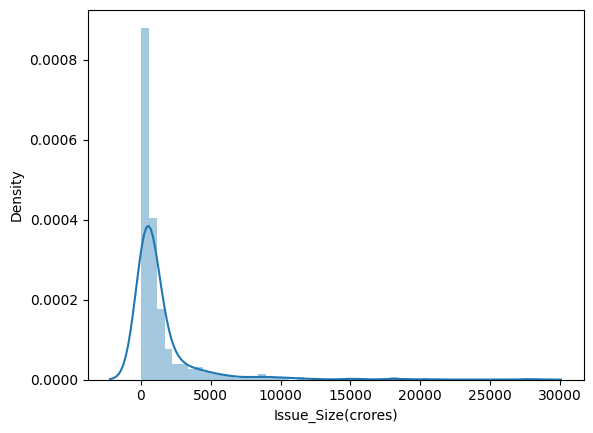

In [ ]:
sns.distplot(df['Issue_Size(crores)'])

<Axes: xlabel='count', ylabel='IPO_Name'>

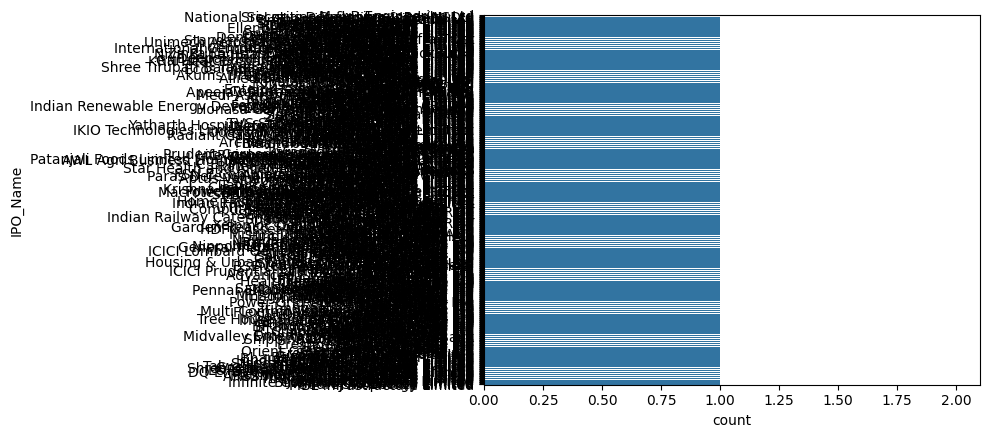

In [ ]:
sns.countplot(df['IPO_Name'])

### **BIVARIATE ANALYSIS**

<function matplotlib.pyplot.show(close=None, block=None)>

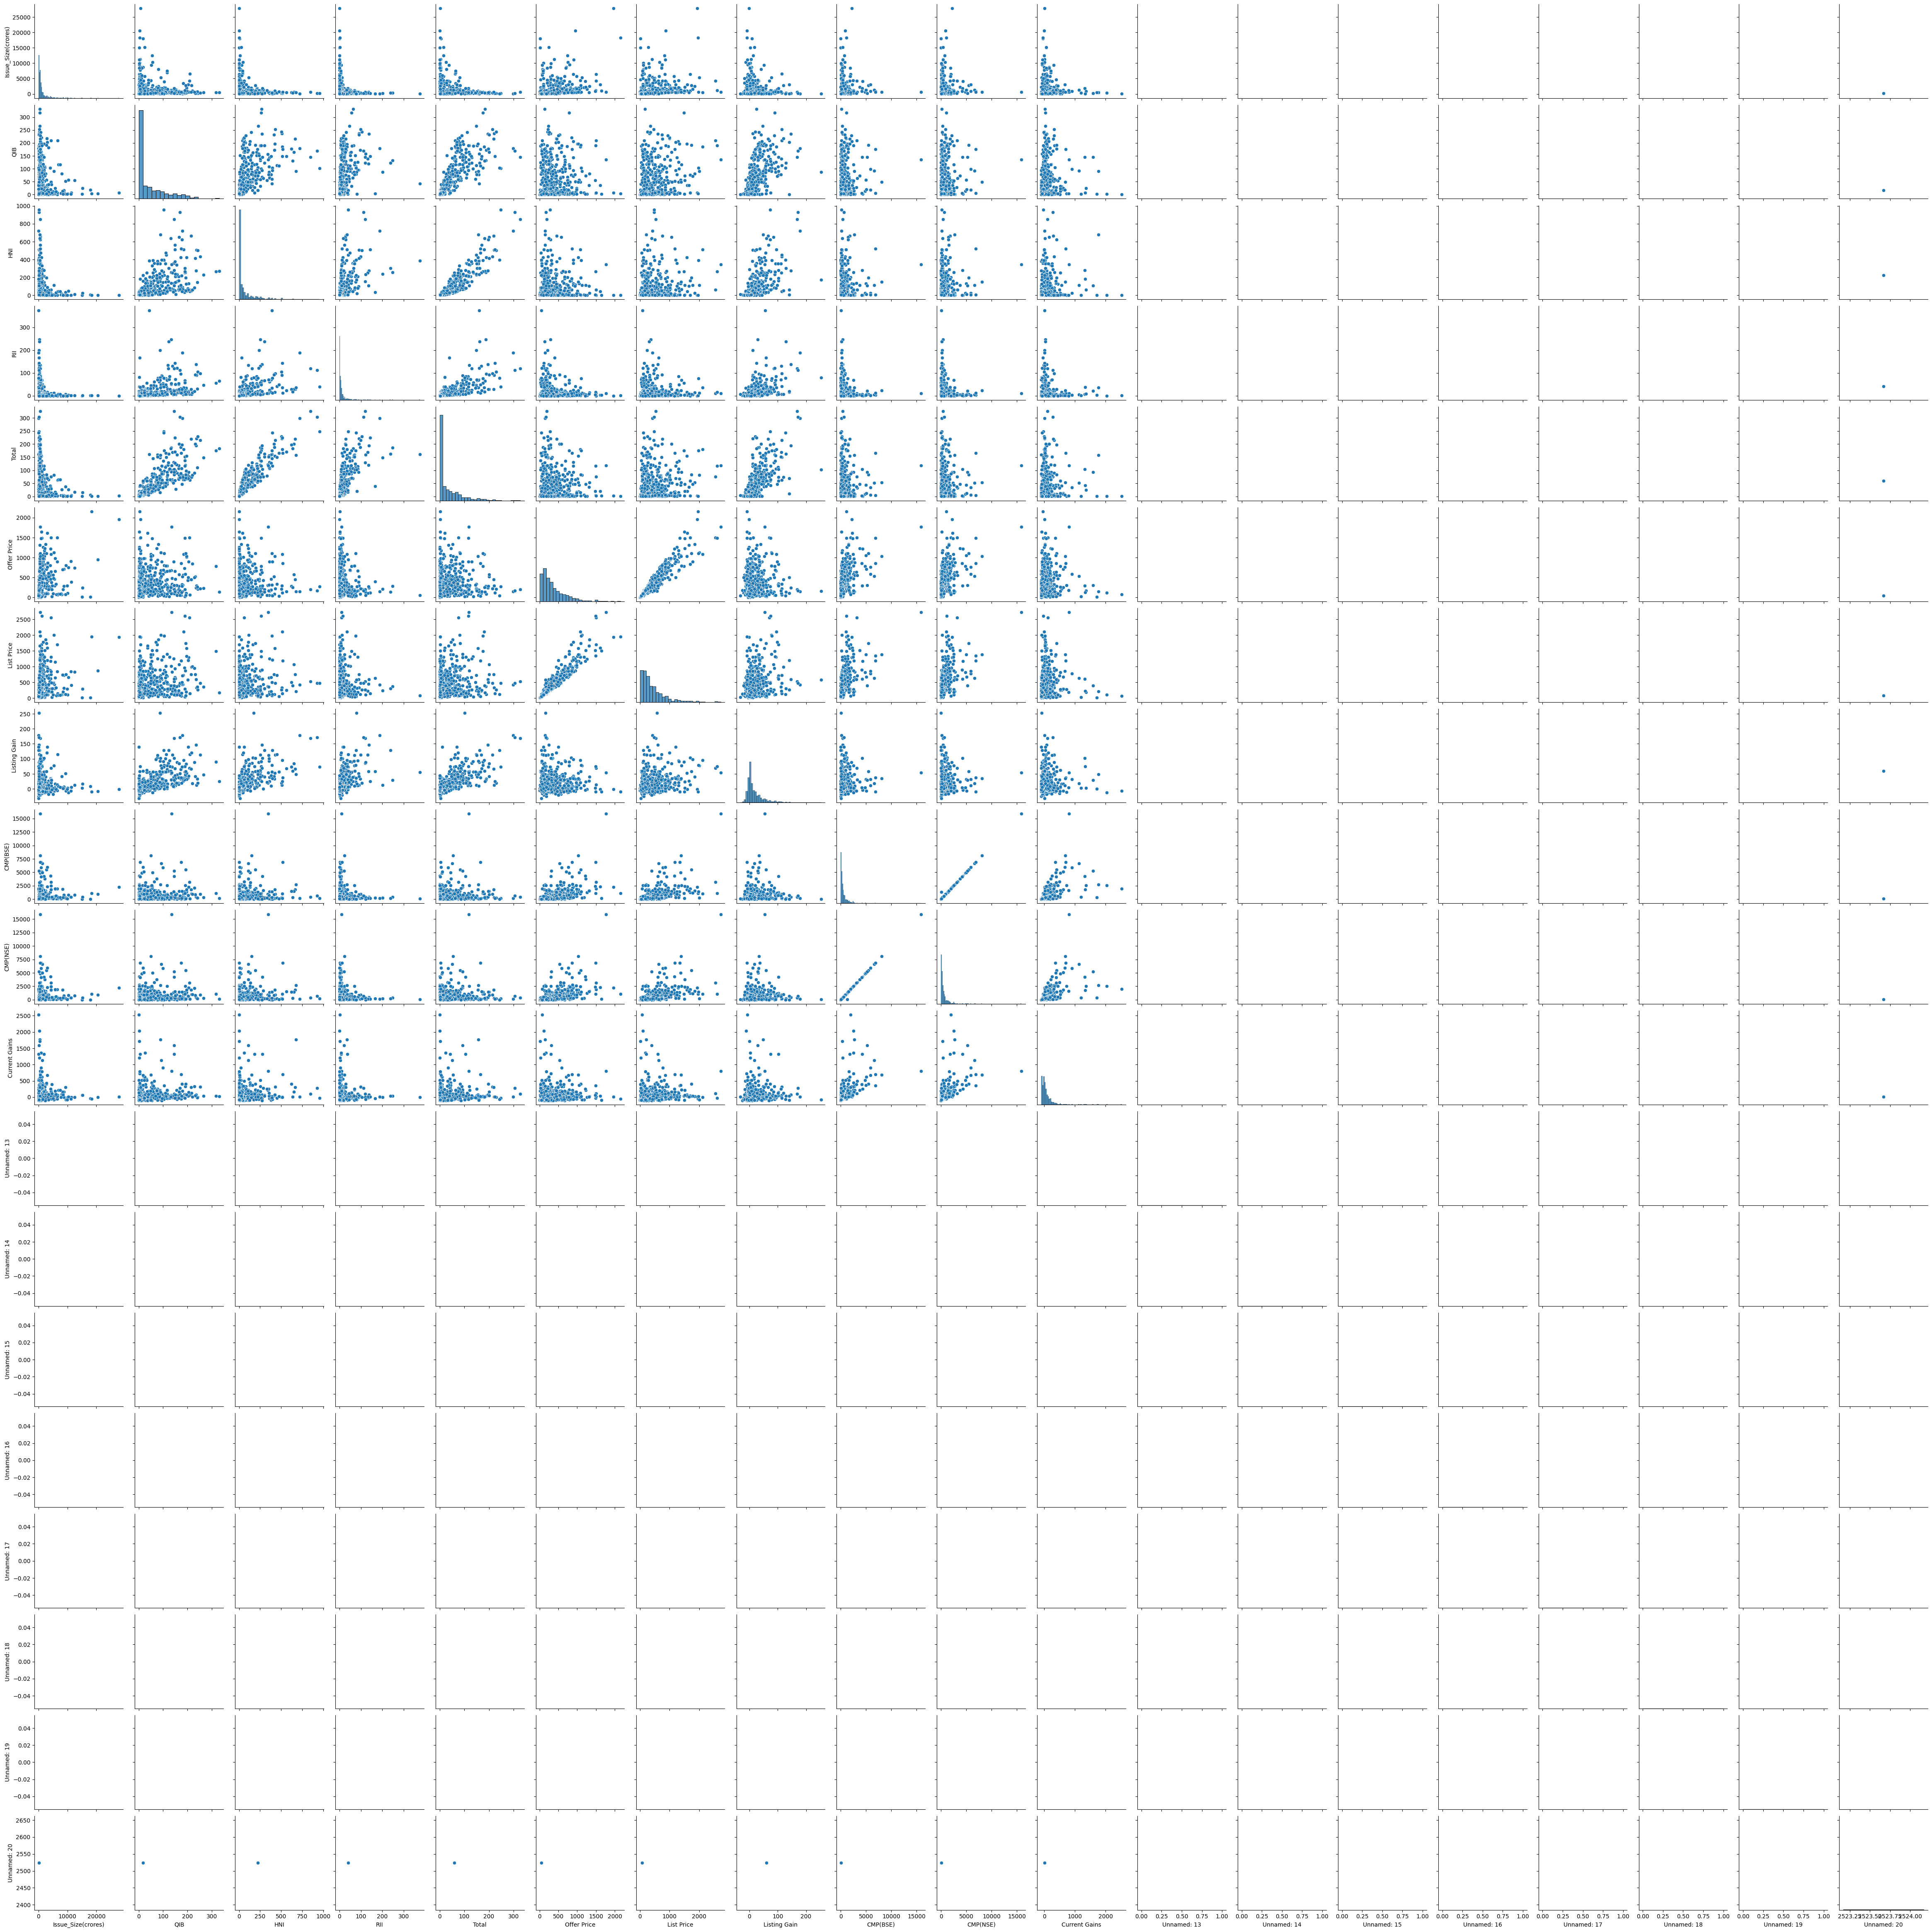

In [ ]:
sns.pairplot(df)
plt.show